# Covid en el mundo - Análisis y Visualización de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploración del dataset

In [2]:
df = pd.read_csv('covid_worldwide.csv')

In [3]:
df.head()

Serial Number  Country  Total Cases Total Deaths Total Recovered  \
0              1      USA  104,196,861    1,132,935     101,322,779   
1              2    India   44,682,784      530,740      44,150,289   
2              3   France   39,524,311      164,233      39,264,546   
3              4  Germany   37,779,833      165,711      37,398,100   
4              5   Brazil   36,824,580      697,074      35,919,372   

  Active Cases     Total Test     Population  
0    1,741,147  1,159,832,679    334,805,269  
1        1,755    915,265,788  1,406,631,776  
2       95,532    271,490,188     65,584,518  
3      216,022    122,332,384     83,883,596  
4      208,134     63,776,166    215,353,593

In [4]:
df.tail()

Serial Number           Country Total Cases Total Deaths Total Recovered  \
226            227  Diamond Princess         712           13             699   
227            228      Vatican City          29          NaN              29   
228            229    Western Sahara          10            1               9   
229            230        MS Zaandam           9            2               7   
230            231           Tokelau           5          NaN             NaN   

    Active Cases Total Test Population  
226            0        NaN        NaN  
227            0        NaN        799  
228            0        NaN    626,161  
229            0        NaN        NaN  
230            5        NaN      1,378

In [5]:
df.shape

(231, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


In [7]:
df.isnull().sum()

Serial Number       0
Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

### Limpieza y preparación de datos

Revisamos la columna con menor número de datos faltantes

In [8]:
df[df['Population'].isnull()]

Serial Number           Country Total Cases Total Deaths Total Recovered  \
90              91             China     503,302        5,272         379,053   
226            227  Diamond Princess         712           13             699   
229            230        MS Zaandam           9            2               7   

    Active Cases   Total Test Population  
90       118,977  160,000,000        NaN  
226            0          NaN        NaN  
229            0          NaN        NaN

Retiramos 'Diamon Princes' y Ms 'Zaandam' porque se trata de barcos comerciales y no países.

In [9]:
df = df.drop([226])
df = df.drop([229])

Completamos la información de 'Population' dada su relevancia en el origen de la pandemia. Según datos de la ONU *1439323776* fue la población del país.

In [10]:
df.loc[90,'Population'] = '1439323776'

Revisamos la columna con mayor número de datos faltantes.

In [11]:
df[df['Total Recovered'].isnull()]

Serial Number                 Country Total Cases Total Deaths  \
10              11                  Turkey  17,042,722      101,492   
65              66                 Tunisia   1,150,356       29,308   
77              78                Paraguay     806,256       19,820   
94              95                Honduras     470,757       11,104   
111            112              Martinique     229,687        1,097   
112            113                    Laos     217,973          758   
113            114                 Iceland     208,688          229   
117            118              Guadeloupe     201,394        1,007   
136            137                Suriname      82,020        1,398   
138            139        French Polynesia      77,957          649   
156            157                Tanzania      42,664          846   
157            158                 Mayotte      42,002          188   
161            162             Isle of Man      38,008          116   
164            165          Faeroe Islands      34,658           28   
172            173         Solomon Islands      24,575          153   
175            176              Micronesia      22,676           58   
206            207            Sierra Leone       7,760          126   
208            209  British Virgin Islands       7,305           64   
214            215               St. Barth       5,420            6   
221            222                  Tuvalu       2,805          NaN   
230            231                 Tokelau           5          NaN   

    Total Recovered Active Cases   Total Test  Population  
10              NaN          NaN  162,743,369  85,561,976  
65              NaN          NaN    4,997,373  12,046,656  
77              NaN          NaN    2,657,506   7,305,843  
94              NaN          NaN    1,619,676  10,221,247  
111             NaN          NaN      828,928     374,087  
112             NaN          NaN    1,233,207   7,481,023  
113             NaN          NaN    1,996,384     345,393  
117             NaN          NaN      938,039     399,794  
136             NaN          NaN      239,603     596,831  
138             NaN          NaN          NaN     284,164  
156             NaN          NaN          NaN  63,298,550  
157             NaN          NaN      176,919     286,259  
161             NaN          NaN      150,753      85,732  
164             NaN          NaN      778,000      49,233  
172             NaN          NaN          NaN     721,159  
175             NaN          NaN       54,967     117,489  
206             NaN          NaN      259,958   8,306,436  
208             NaN          NaN      107,339      30,596  
214             NaN          NaN       78,646       9,945  
221             NaN        2,805          NaN      12,066  
230             NaN            5          NaN       1,378

Retiramos filas que contienen datos faltantes.

In [12]:
df = df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 224
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    196 non-null    int64 
 1   Country          196 non-null    object
 2   Total Cases      196 non-null    object
 3   Total Deaths     196 non-null    object
 4   Total Recovered  196 non-null    object
 5   Active Cases     196 non-null    object
 6   Total Test       196 non-null    object
 7   Population       196 non-null    object
dtypes: int64(1), object(7)
memory usage: 13.8+ KB


Retiramos la columna 'Serial Number' pues no aportará al análisis que se realizará después. Luego, se reinician los índices.

In [14]:
df.drop(columns='Serial Number', inplace=True)
df.reset_index(inplace=True)

In [15]:
df.drop(columns='index', inplace=True)
df

Country  Total Cases Total Deaths Total Recovered  \
0                      USA  104,196,861    1,132,935     101,322,779   
1                    India   44,682,784      530,740      44,150,289   
2                   France   39,524,311      164,233      39,264,546   
3                  Germany   37,779,833      165,711      37,398,100   
4                   Brazil   36,824,580      697,074      35,919,372   
..                     ...          ...          ...             ...   
191               Anguilla        3,904           12           3,879   
192                  Macao        3,488          120           3,357   
193  Saint Pierre Miquelon        3,452            2           2,449   
194      Wallis and Futuna        3,427            7             438   
195             Montserrat        1,403            8           1,376   

    Active Cases     Total Test     Population  
0      1,741,147  1,159,832,679    334,805,269  
1          1,755    915,265,788  1,406,631,776  
2         95,532    271,490,188     65,584,518  
3        216,022    122,332,384     83,883,596  
4        208,134     63,776,166    215,353,593  
..           ...            ...            ...  
191           13         51,382         15,230  
192           11          7,850        667,490  
193        1,001         25,400          5,759  
194        2,982         20,508         10,982  
195           19         17,762          4,965  

[196 rows x 7 columns]

In [16]:
df['Total Cases'] = df['Total Cases'].str.replace(',','',regex=True).astype(int)
df['Total Test'] = df['Total Test'].str.replace(',','',regex=True).astype(int)
df['Total Deaths'] = df['Total Deaths'].str.replace(',','',regex=True).astype(int)
df['Total Recovered'] = df['Total Recovered'].str.replace(',','',regex=True).astype(int)
df['Active Cases'] = df['Active Cases'].str.replace(',','',regex=True).astype(int)
df['Population'] = df['Population'].str.replace(',','',regex=True).astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          196 non-null    object
 1   Total Cases      196 non-null    int32 
 2   Total Deaths     196 non-null    int32 
 3   Total Recovered  196 non-null    int32 
 4   Active Cases     196 non-null    int32 
 5   Total Test       196 non-null    int32 
 6   Population       196 non-null    int32 
dtypes: int32(6), object(1)
memory usage: 6.2+ KB


### Creación de columnas

Creamos una columna para la tasa de mortalidad y tasa de positividad.

In [18]:
df['Mortality'] = (df['Total Deaths'] / df['Total Cases']) * 100
df['Positivity'] = (df['Total Cases'] / df['Total Test']) * 100
df

Country  Total Cases  Total Deaths  Total Recovered  \
0                      USA    104196861       1132935        101322779   
1                    India     44682784        530740         44150289   
2                   France     39524311        164233         39264546   
3                  Germany     37779833        165711         37398100   
4                   Brazil     36824580        697074         35919372   
..                     ...          ...           ...              ...   
191               Anguilla         3904            12             3879   
192                  Macao         3488           120             3357   
193  Saint Pierre Miquelon         3452             2             2449   
194      Wallis and Futuna         3427             7              438   
195             Montserrat         1403             8             1376   

     Active Cases  Total Test  Population  Mortality  Positivity  
0         1741147  1159832679   334805269   1.087302    8.983784  
1            1755   915265788  1406631776   1.187795    4.881946  
2           95532   271490188    65584518   0.415524   14.558283  
3          216022   122332384    83883596   0.438623   30.882937  
4          208134    63776166   215353593   1.892958   57.740348  
..            ...         ...         ...        ...         ...  
191            13       51382       15230   0.307377    7.597992  
192            11        7850      667490   3.440367   44.433121  
193          1001       25400        5759   0.057937   13.590551  
194          2982       20508       10982   0.204260   16.710552  
195            19       17762        4965   0.570207    7.898885  

[196 rows x 9 columns]

### Visualización de Datos

In [19]:
sns.set_style('whitegrid')

**Países con más casos**

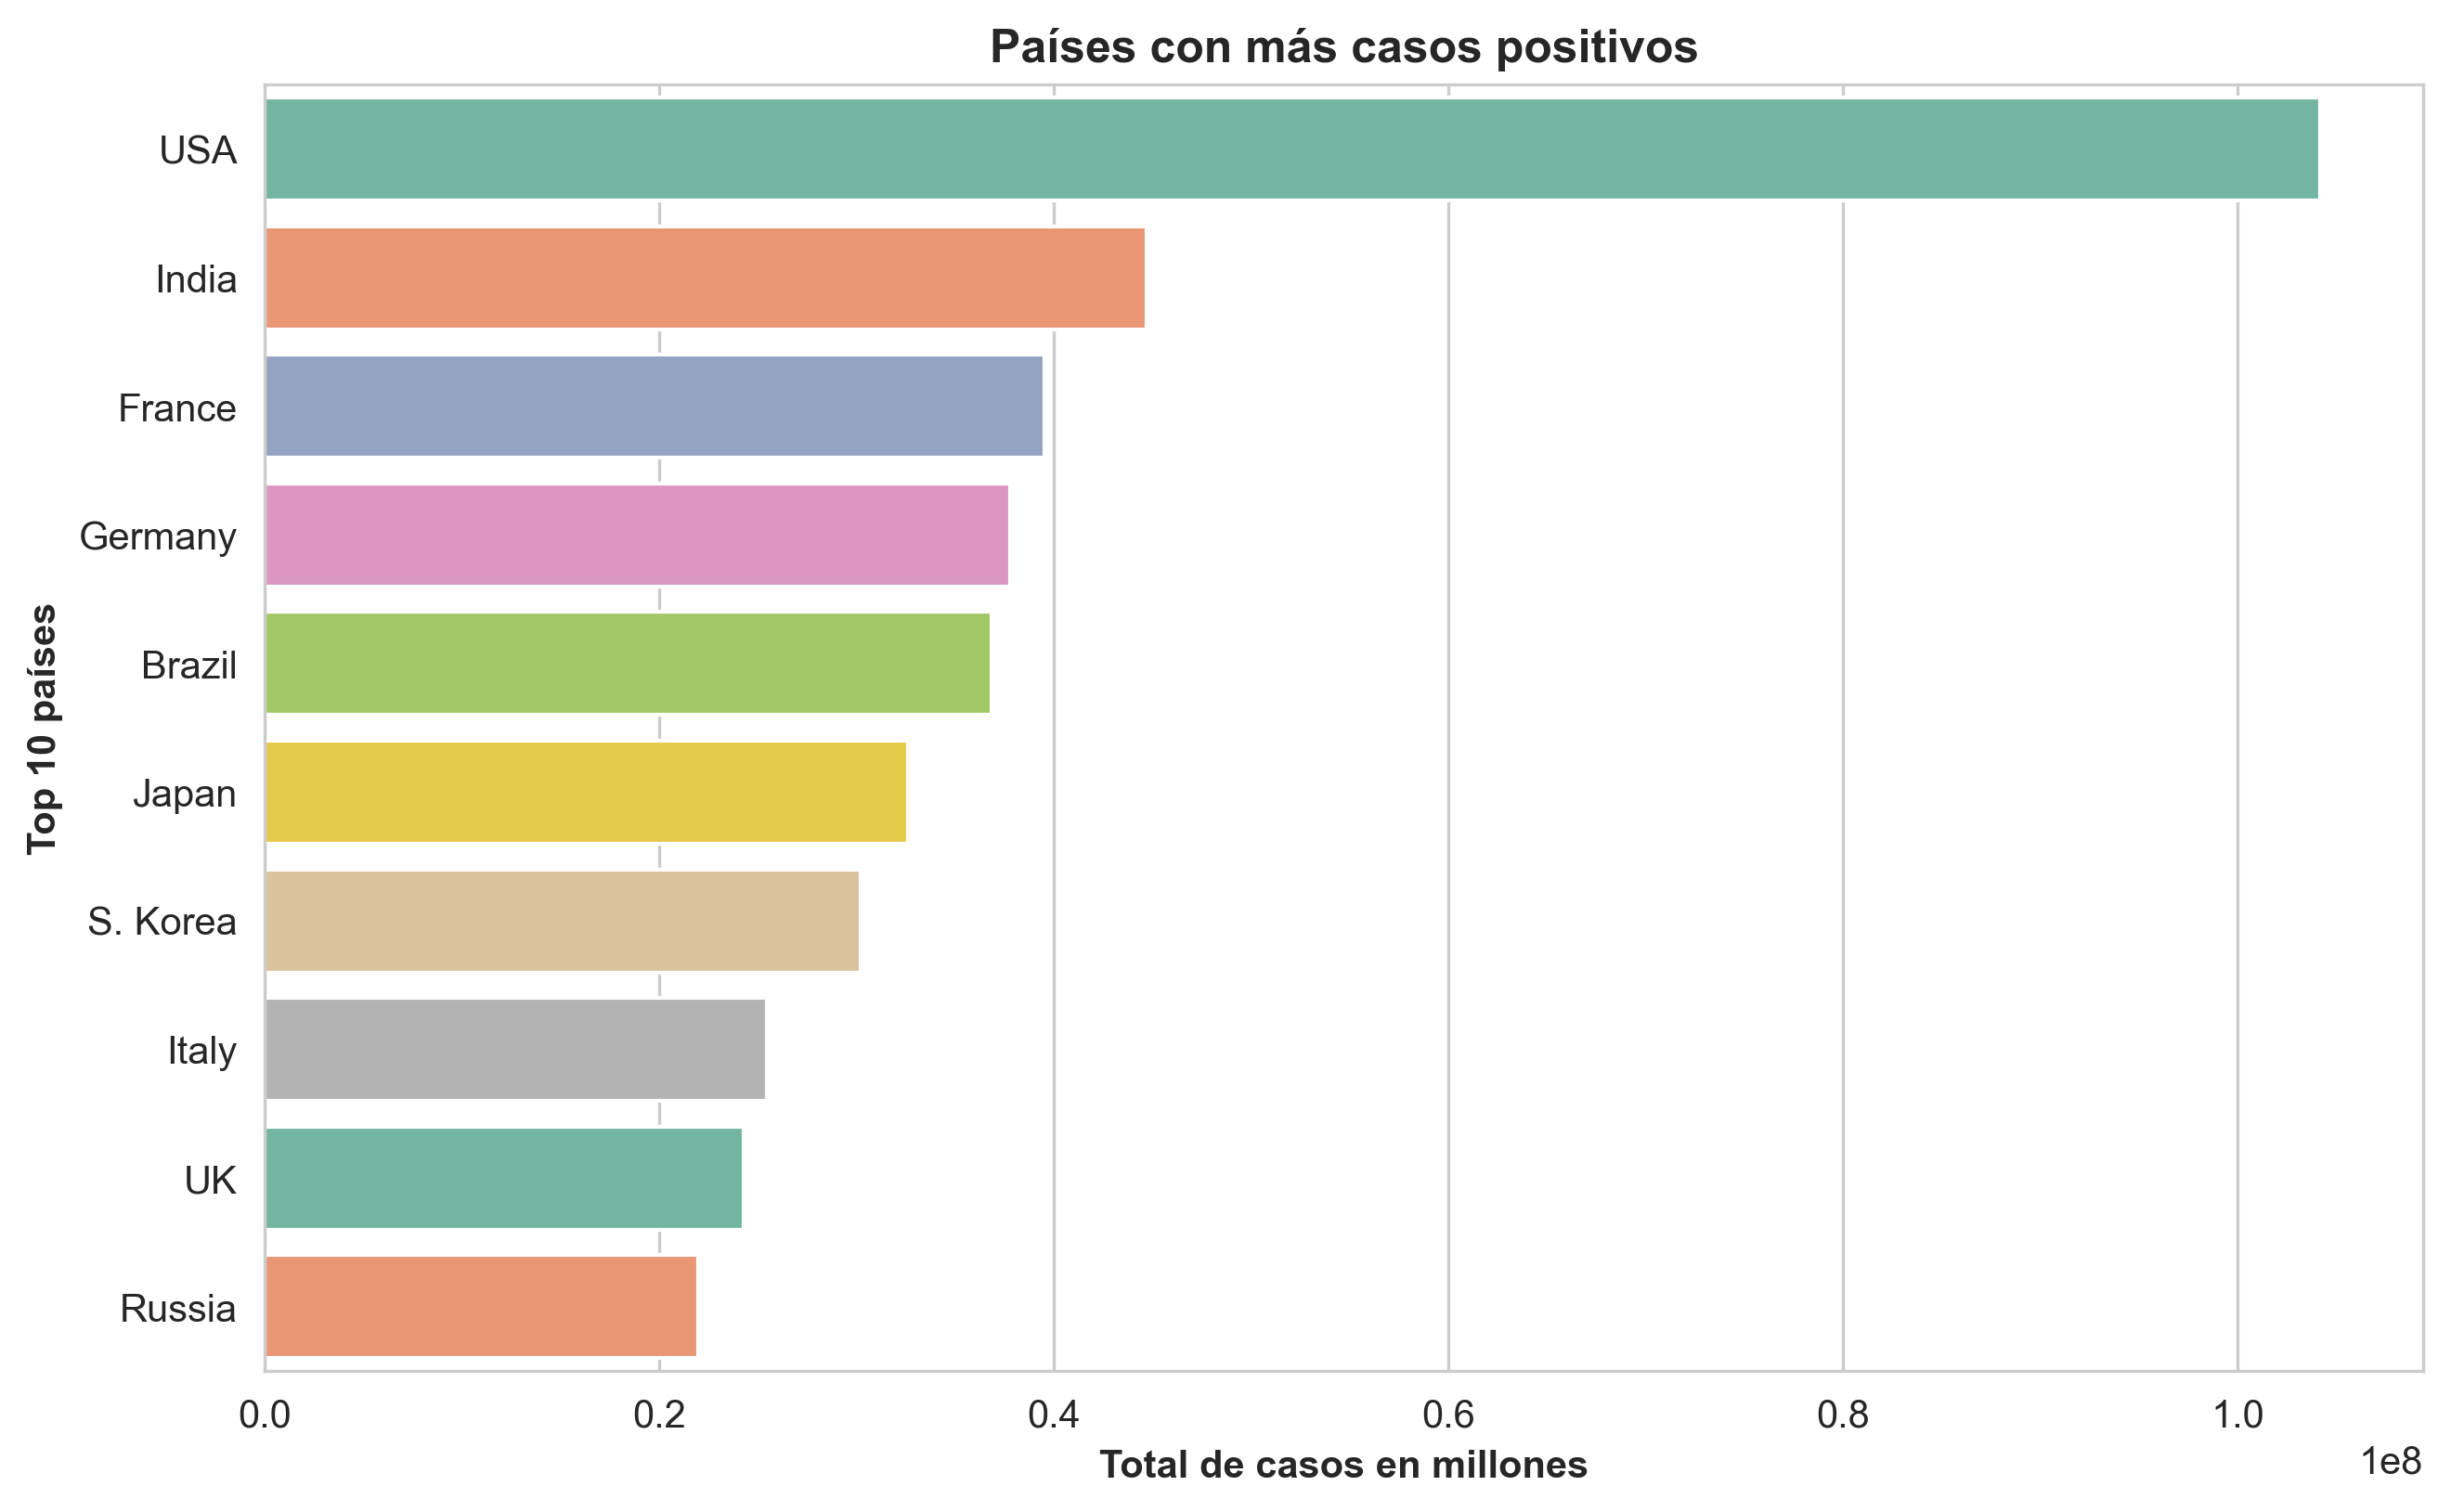

In [20]:
plt.figure(figsize=(10,6), dpi=300)
sns.barplot(data=df.nlargest(10, 'Total Cases'), x='Total Cases', y='Country', palette='Set2')
plt.title('Países con más casos positivos', weight='bold')
plt.xlabel('Total de casos en millones', weight='bold')
plt.ylabel('Top 10 países', weight='bold');

Estados Unidos es, por lejos, el país con mayor cantidad de casos detectados. Esto se debe a la gran cantidad de test de descarte con las que cuenta.

**Comparación de casos detectados y recuperados**

In [21]:
comp = df[['Country','Total Cases', 'Total Recovered']]
comp_grap = comp.nlargest(10, 'Total Cases')

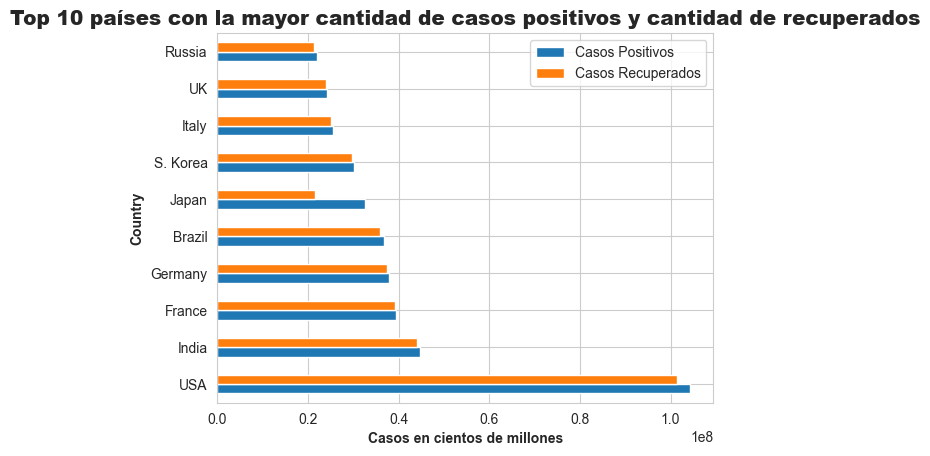

In [22]:
comp_grap.plot(x='Country', kind='barh', stacked=False)

plt.title('Top 10 países con la mayor cantidad de casos positivos y cantidad de recuperados', weight='heavy', fontsize='x-large')
plt.xlabel('Casos en cientos de millones', weight='bold')
plt.ylabel('Country', weight='bold')

plt.legend(['Casos Positivos', 'Casos Recuperados']);

Dentro de los países con mayor cantidad de casos, se puede observar una tasa de recuperación alta. Sin embargo, un caso a tener en cuenta es el de Japon pues hay una notable diferencia con los otros países.

**Top 10 países con mayor tasa de mortalidad**

In [23]:
top_deaths = df.nlargest(10, 'Mortality')
top_deaths

Country  Total Cases  Total Deaths  Total Recovered  \
175                   Yemen        11945          2159             9124   
133                   Sudan        63742          5001            58284   
137                   Syria        57453          3164            54289   
154                 Somalia        27318          1361            13182   
32                     Peru      4481621        218931          4258688   
84                    Egypt       515645         24613           442182   
17                   Mexico      7368252        332198          6606633   
91   Bosnia and Herzegovina       401384         16255           379084   
106             Afghanistan       208545          7882           186088   
183                 Liberia         8062           294             7766   

     Active Cases  Total Test  Population  Mortality  Positivity  
175           662      329592    31154867  18.074508    3.624178  
133           457      562941    45992020   7.845690   11.323034  
137             0      146269    19364809   5.507110   39.279000  
154         12775      400466    16841795   4.982063    6.821553  
32           4002    37754603    33684208   4.885085   11.870396  
84          48850     3693367   106156692   4.773245   13.961380  
17         429421    19356195   131562772   4.508505   38.066634  
91           6045     1884721     3249317   4.049738   21.296733  
106         14575     1188898    40754388   3.779520   17.541034  
183             2      139824     5305117   3.646738    5.765820

In [24]:
top_deaths.loc[91,'Country'] = 'Bosnia'

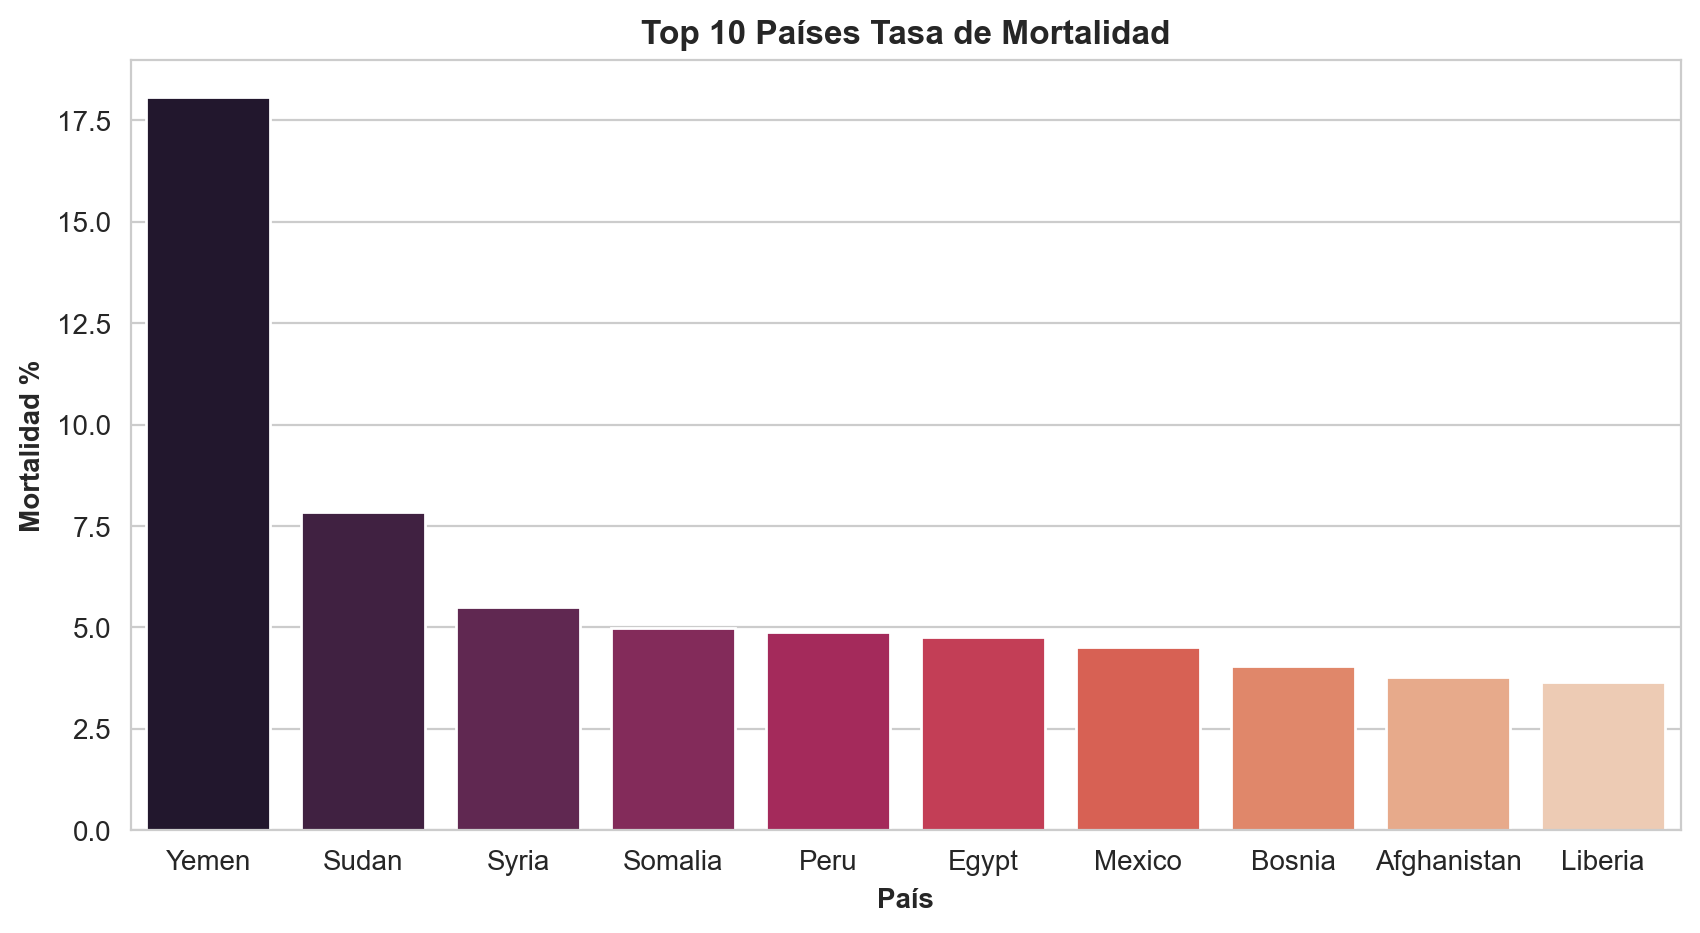

In [25]:
plt.figure(figsize=(10,5), dpi=200)
sns.barplot(data=top_deaths, x='Country', y='Mortality', palette='rocket')
plt.title('Top 10 Países Tasa de Mortalidad', weight='bold')
plt.xlabel('País', weight='bold')
plt.ylabel('Mortalidad %', weight='bold');

Yemen es el país con mayor tasa de mortalidad. Perú(5) y México(7) son los países de Latinoamérica más afectados.

In [26]:
top_positive = df.nlargest(10,'Positivity')
top_positive

Country  Total Cases  Total Deaths  Total Recovered  \
6               S. Korea     30197066         33486         29740877   
101              Algeria       271378          6881           182749   
127        New Caledonia        79845           314            79526   
4                 Brazil     36824580        697074         35919372   
181  Antigua and Barbuda         9106           146             8954   
173              Vanuatu        12014            14            11976   
54              Slovenia      1321852          7056          1311159   
192                Macao         3488           120             3357   
61               Bolivia      1187986         22346          1146143   
178              Eritrea        10189           103            10086   

     Active Cases  Total Test  Population  Mortality  Positivity  
6          422703    15804065    51329899   0.110892  191.071512  
101         81748      230861    45350148   2.535578  117.550387  
127             5       98964      290915   0.393262   80.680854  
4          208134    63776166   215353593   1.892958   57.740348  
181             6       18901       99509   1.603338   48.177345  
173            24       24976      321832   0.116531   48.102178  
54           3637     2824843     2078034   0.533797   46.793822  
192            11        7850      667490   3.440367   44.433121  
61          19497     2705422    11992656   1.880999   43.911301  
178             0       23693     3662244   1.010894   43.004263

**Top 10 países con mayor tasa de positividad**

In [27]:
top_positive.loc[127,'Country'] = 'Caledonia'
top_positive.loc[181,'Country'] = 'Ant-Barb'

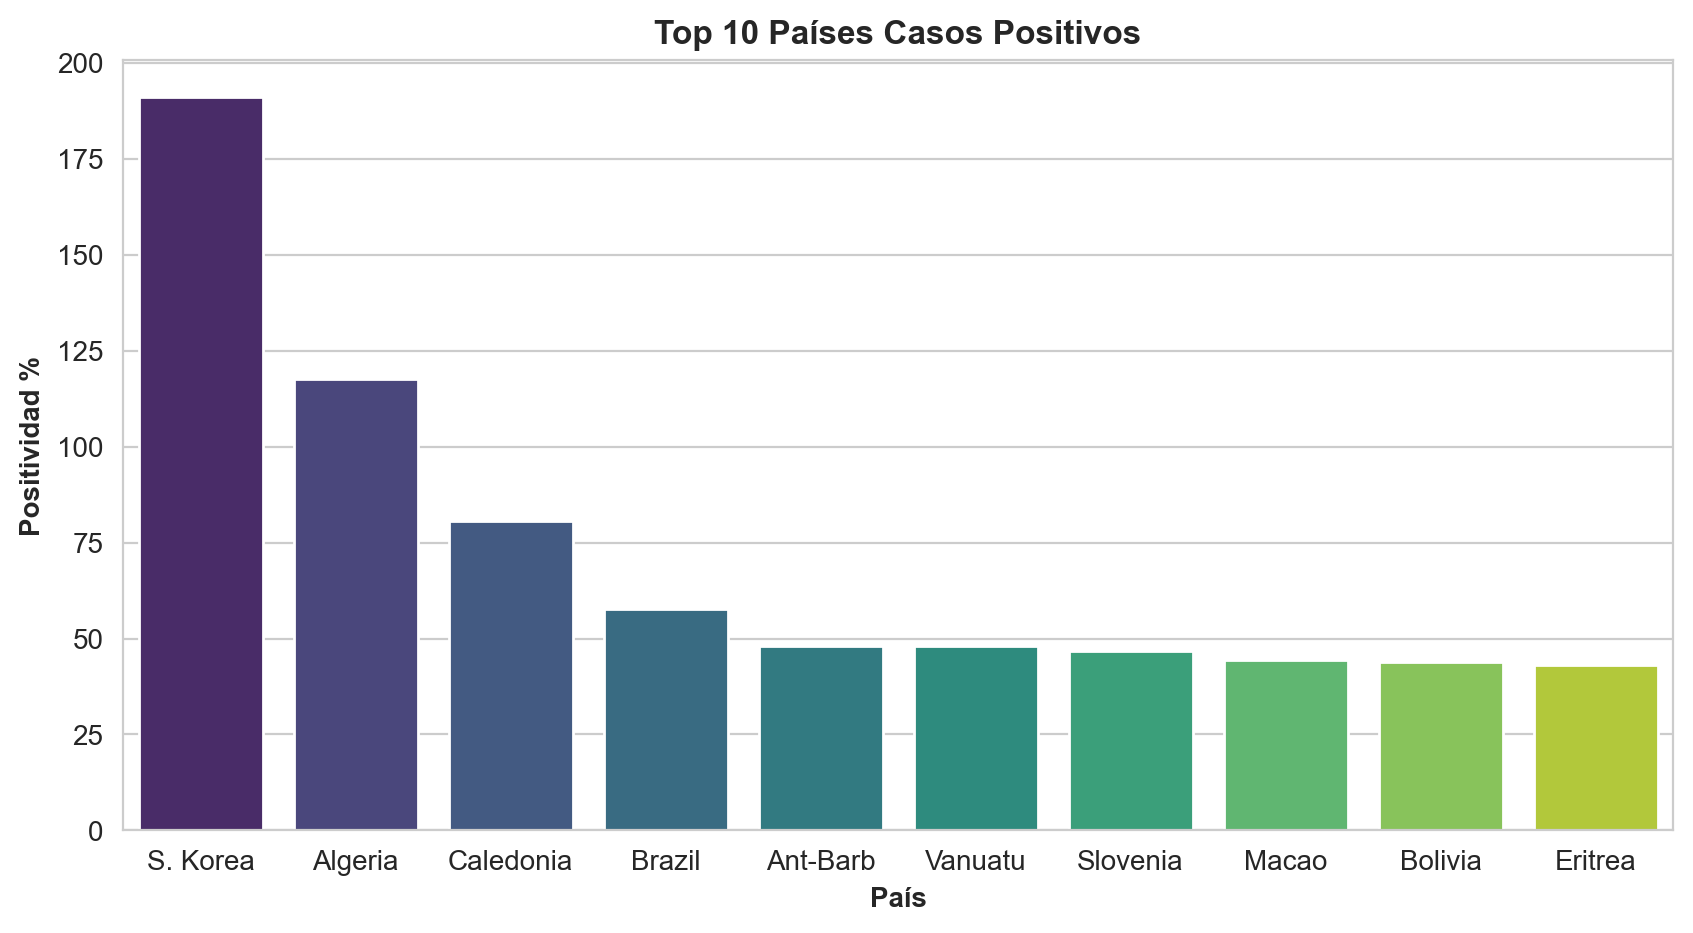

In [28]:
plt.figure(figsize=(10,5), dpi=200)
sns.barplot(data=top_positive, x='Country', y='Positivity', palette='viridis')
plt.title('Top 10 Países Casos Positivos', weight='bold')
plt.xlabel('País', weight='bold')
plt.ylabel('Positividad %', weight='bold');

Países como Coreal del Sur y Algeria presentan una tasa de positividad superior al 100%. Se puede asumir que los pacientes son diagnosticados con la enfermedad sin haber pasado por un test de descarte.

**Correlación entre variables**

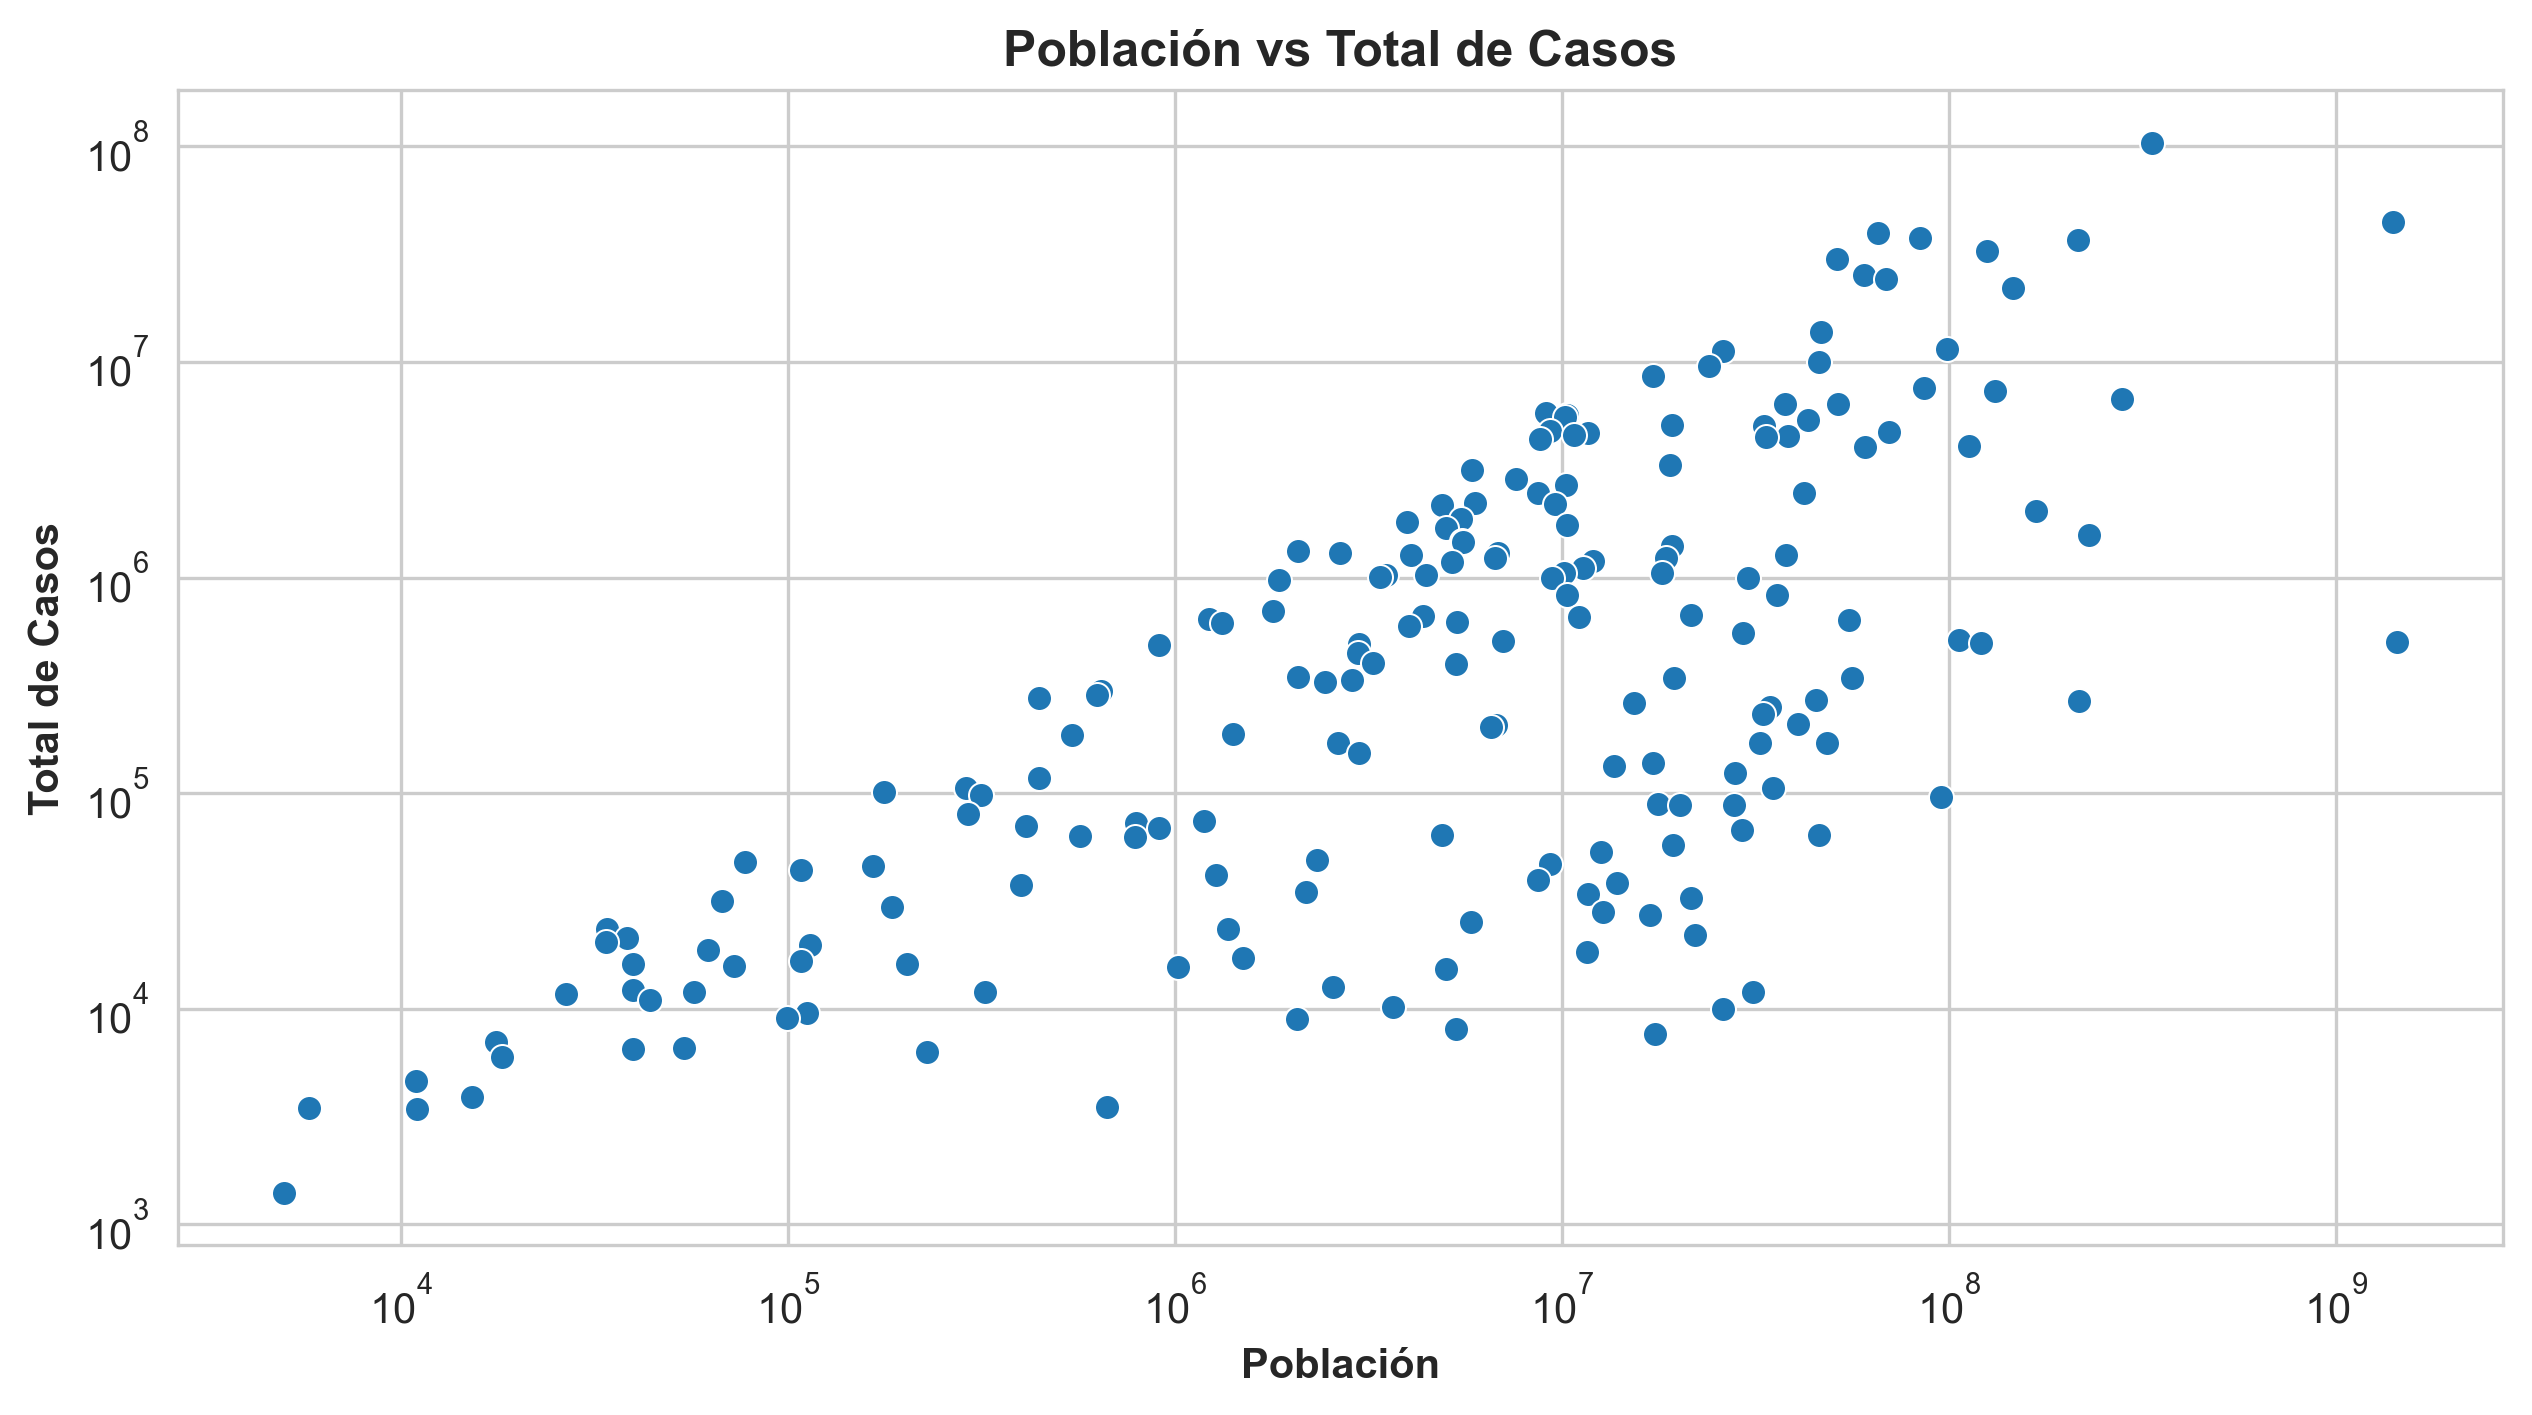

In [29]:
plt.figure(figsize=(10,5), dpi=300)
sc = sns.scatterplot(data=df, x='Population', y='Total Cases')
sc.set_xscale('log')
sc.set_yscale('log')
sc.set_title('Población vs Total de Casos', weight='bold')
sc.set_xlabel('Población', weight='bold')
sc.set_ylabel('Total de Casos', weight='bold');

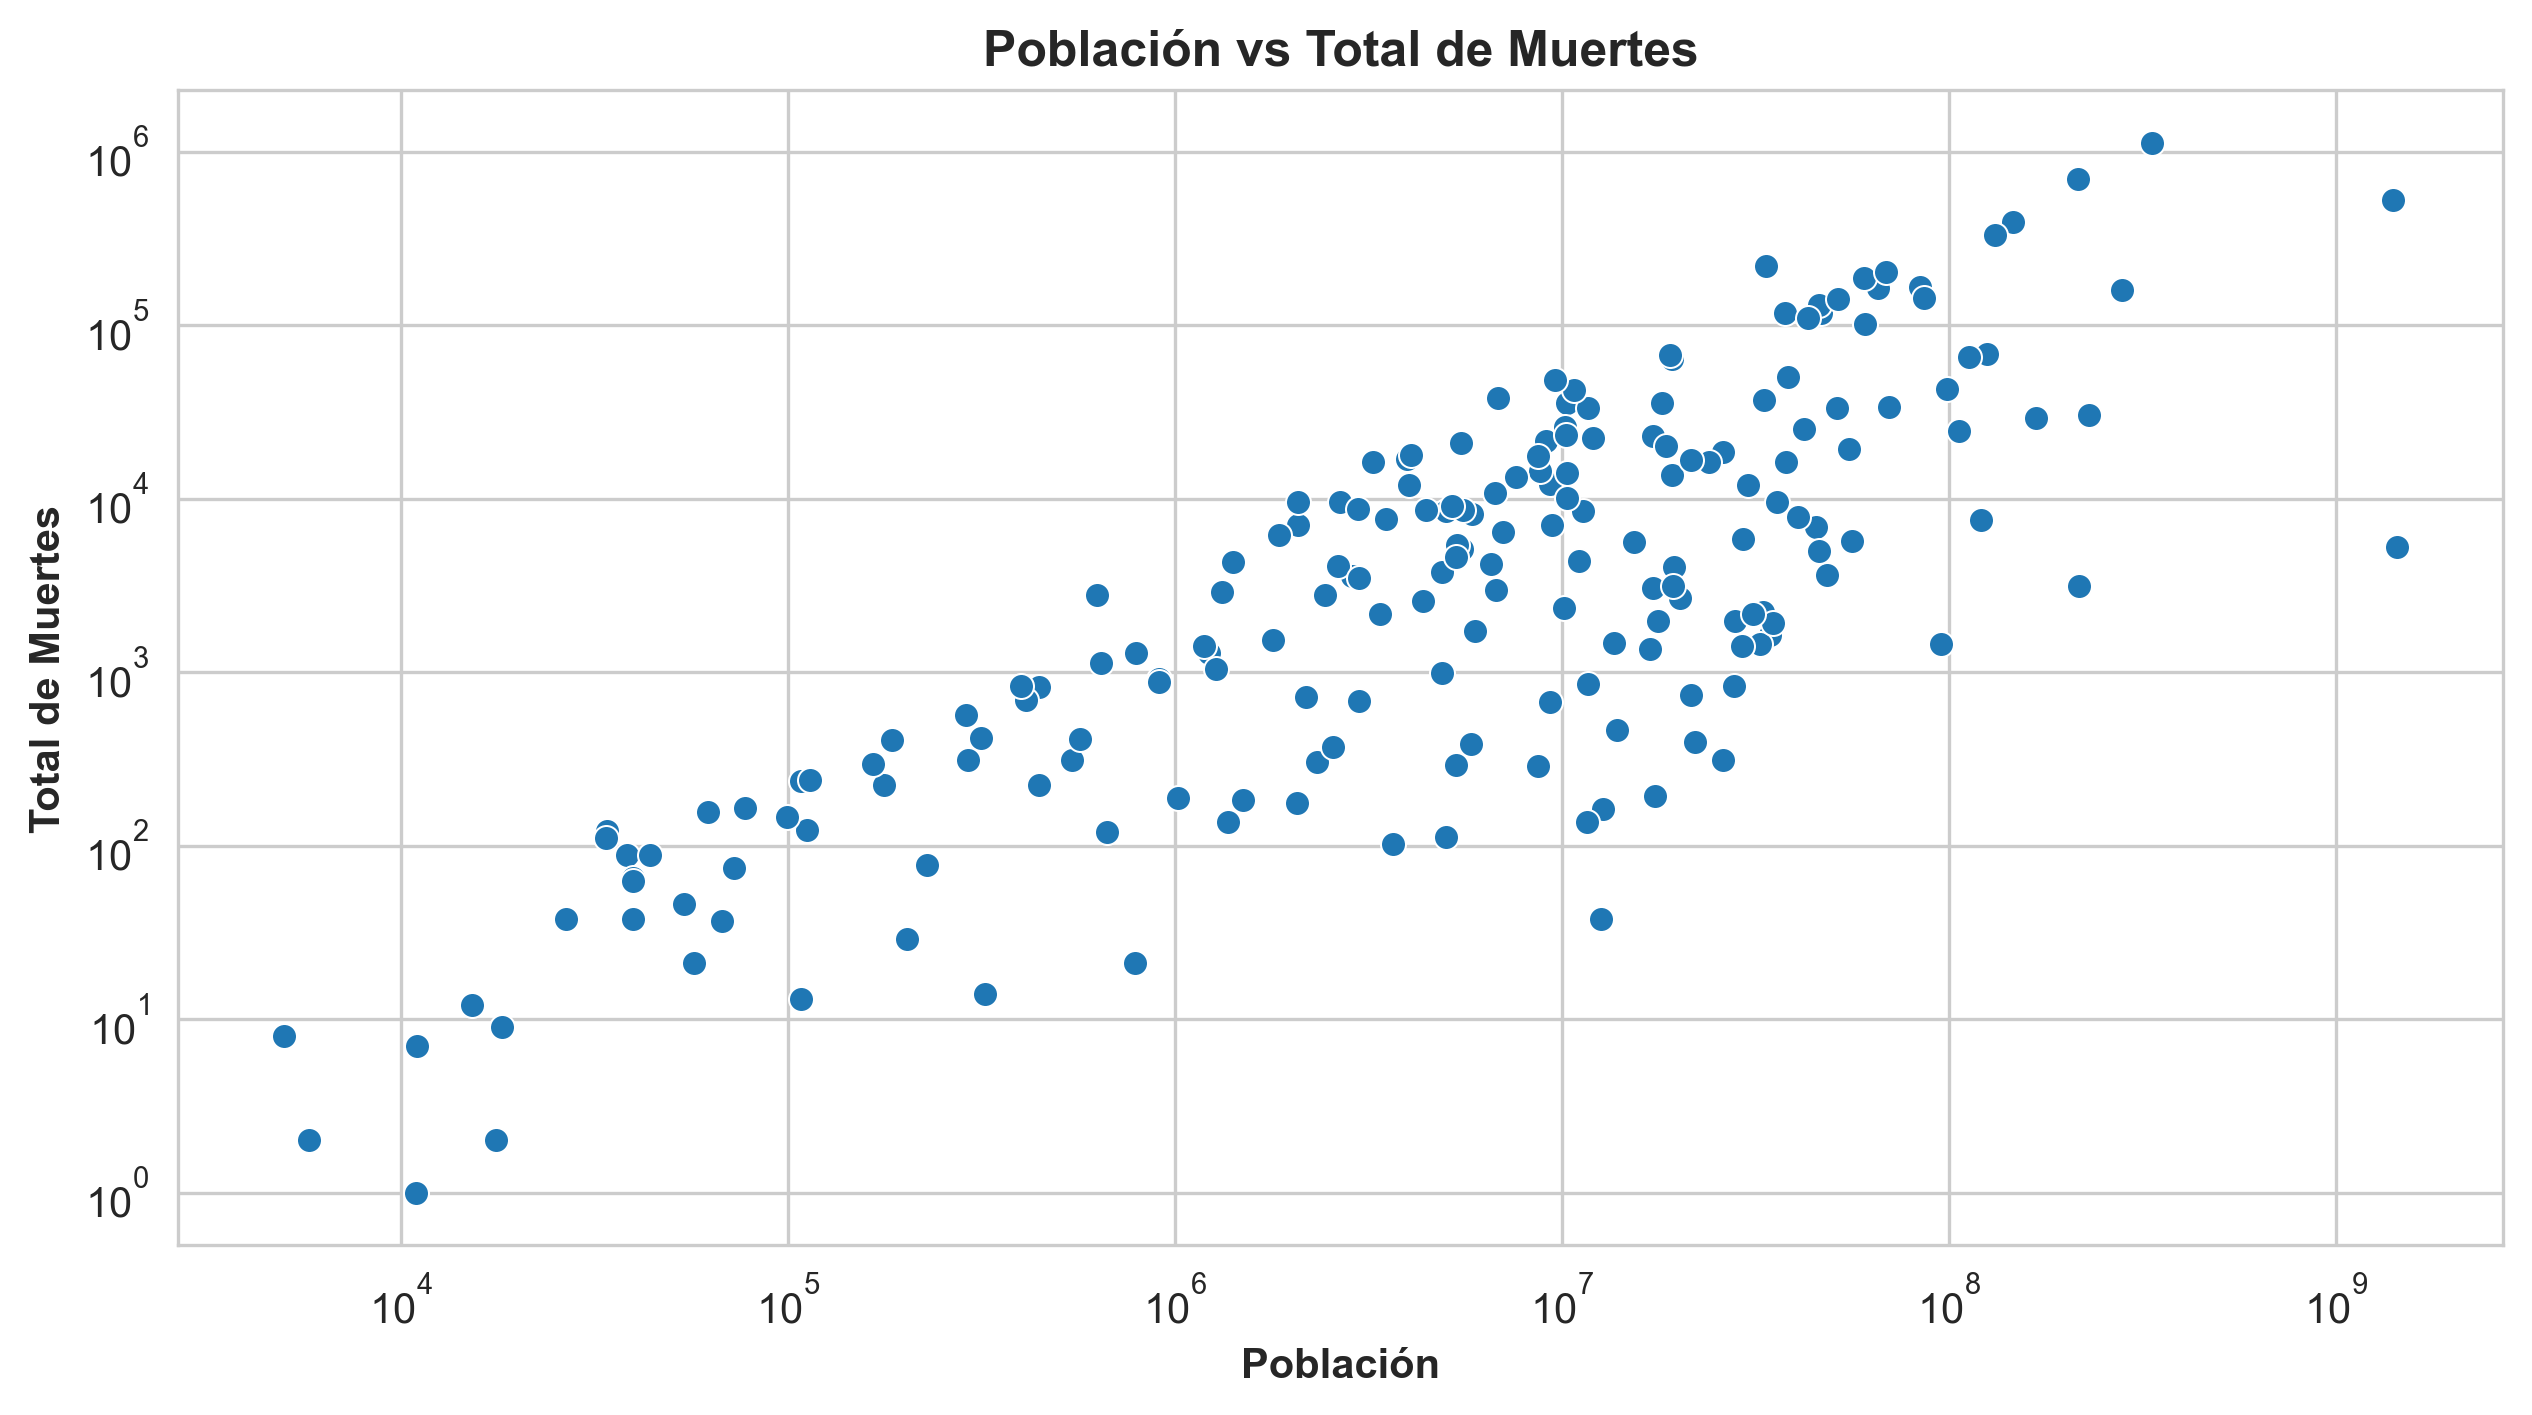

In [30]:
plt.figure(figsize=(10,5), dpi=300)
sc = sns.scatterplot(data=df, x='Population', y='Total Deaths')
sc.set_xscale('log')
sc.set_yscale('log')
sc.set_title('Población vs Total de Muertes', weight='bold')
sc.set_xlabel('Población', weight='bold')
sc.set_ylabel('Total de Muertes', weight='bold');

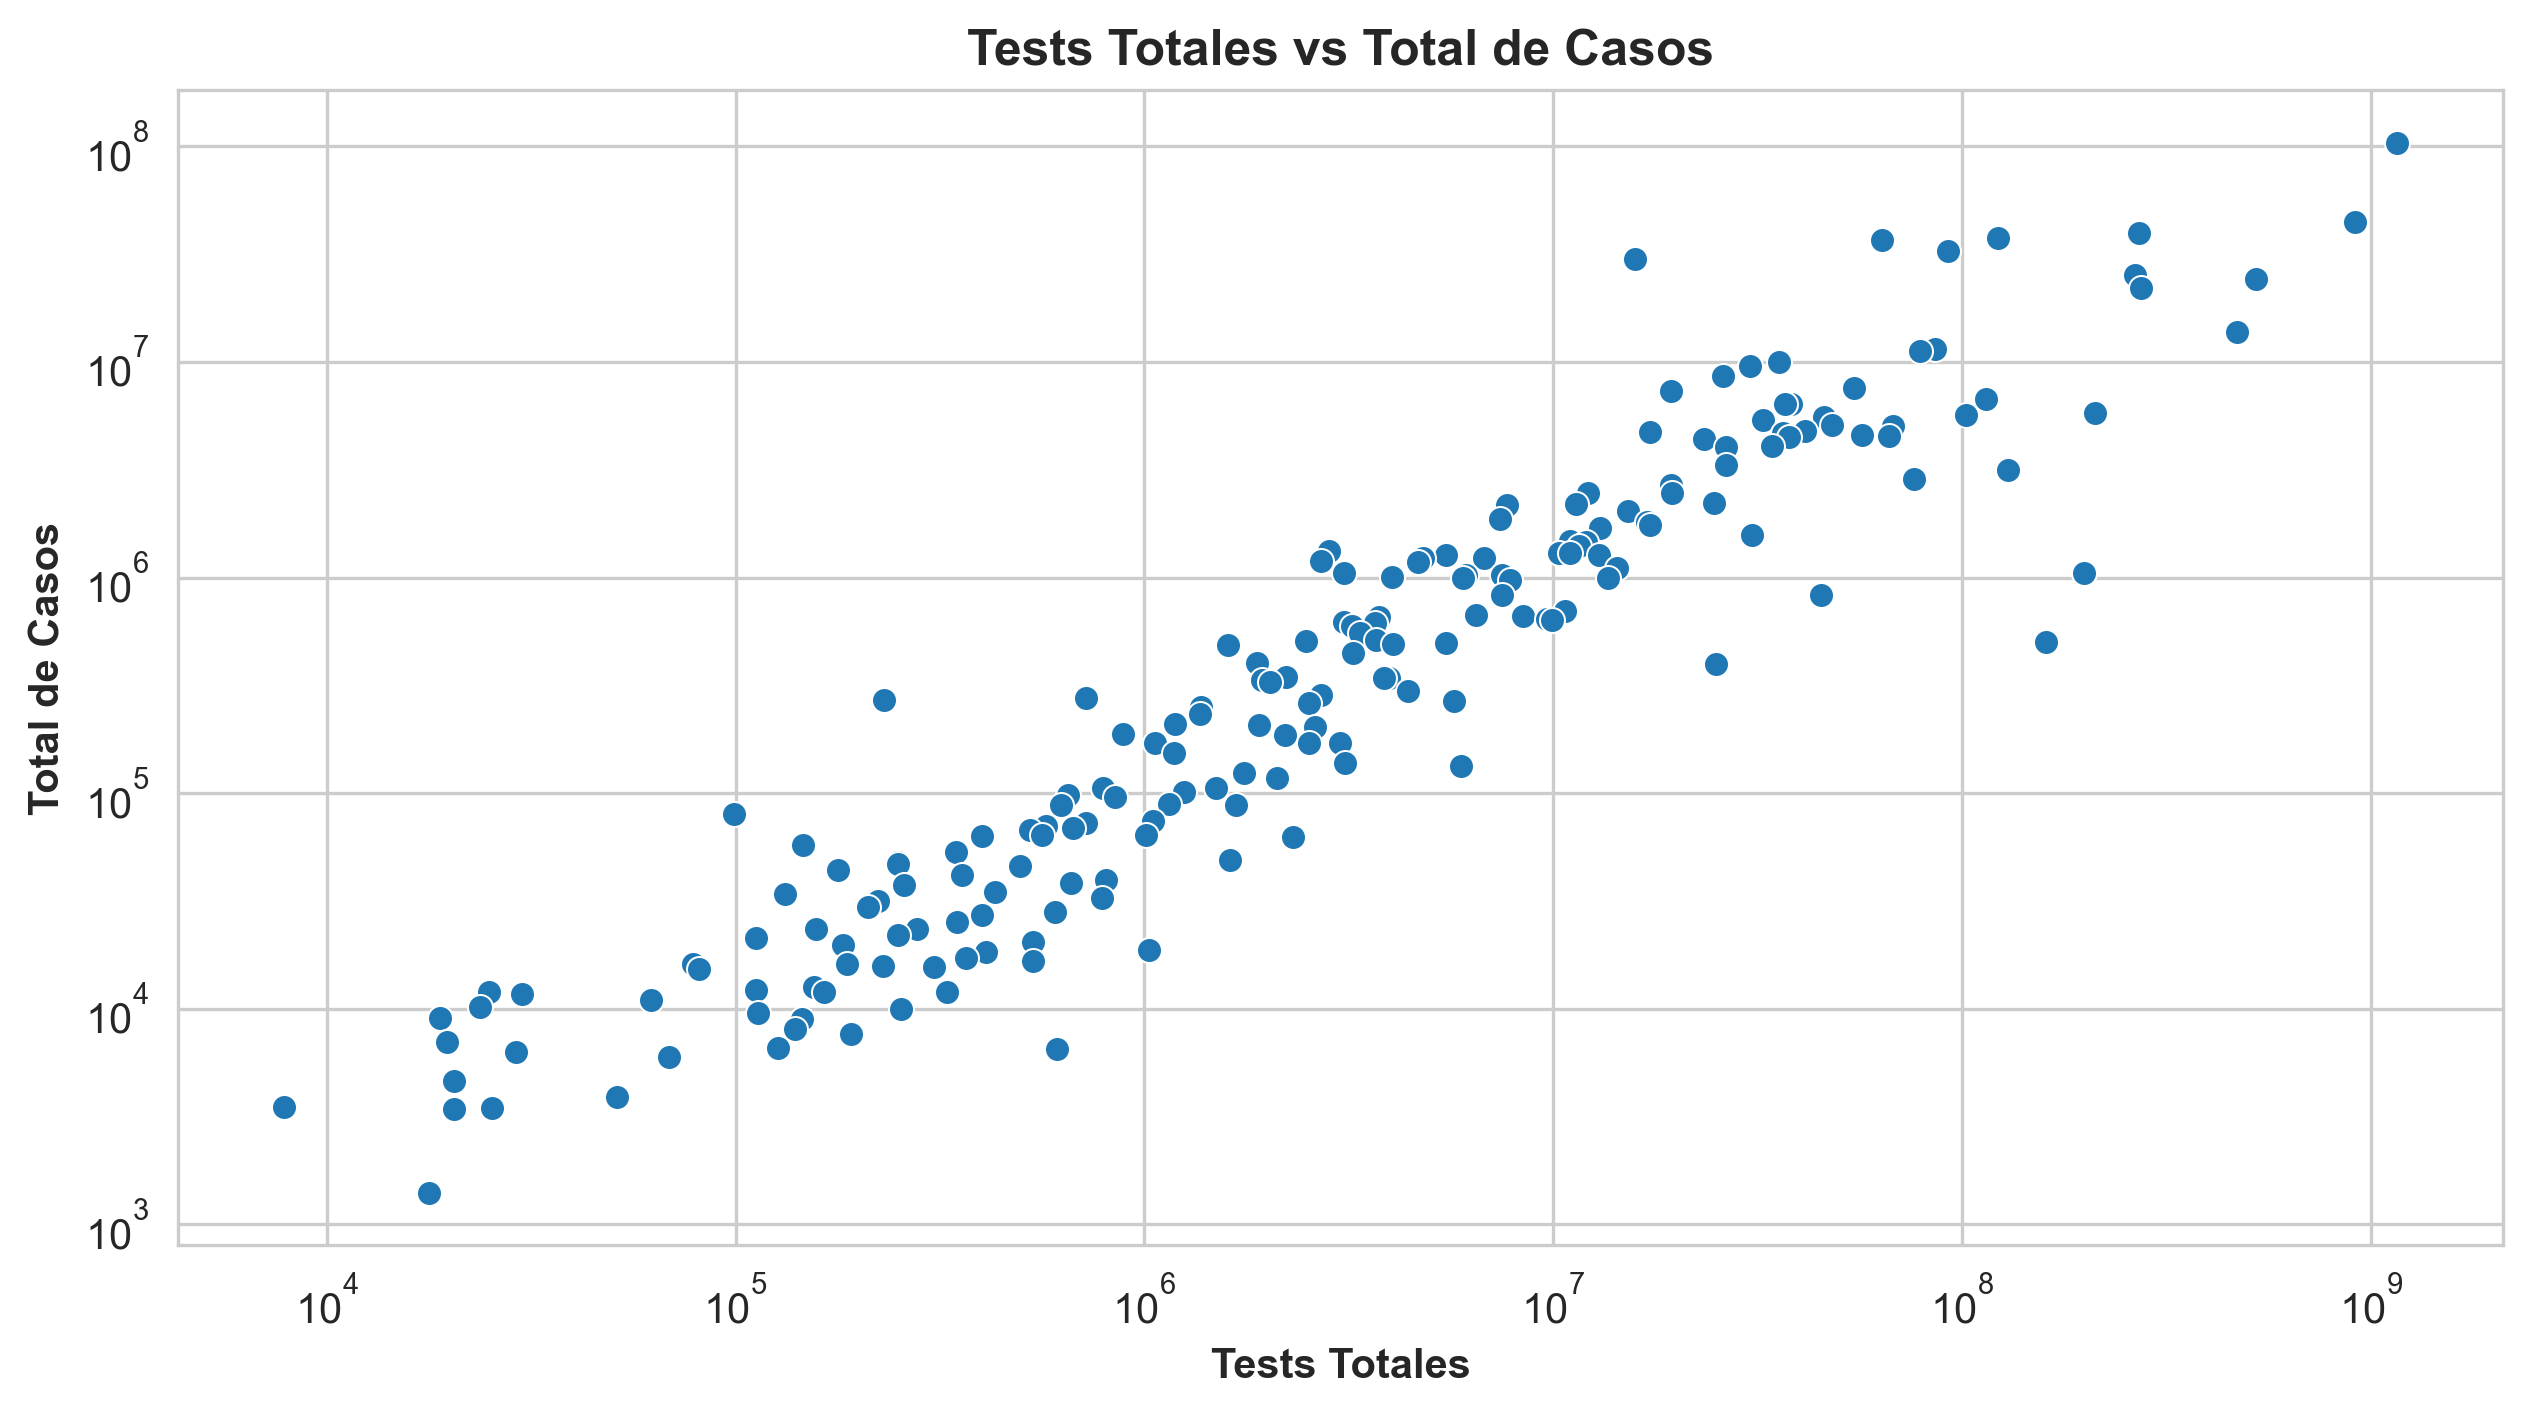

In [31]:
plt.figure(figsize=(10,5), dpi=300)
sc = sns.scatterplot(data=df, x='Total Test', y='Total Cases')
sc.set_xscale('log')
sc.set_yscale('log')
sc.set_title('Tests Totales vs Total de Casos', weight='bold')
sc.set_xlabel('Tests Totales', weight='bold')
sc.set_ylabel('Total de Casos', weight='bold');

Las tres gráficas indican una correlación positiva entre las variables.

### Extra: Maps

In [32]:
import plotly.express as px

**Mapa del total de casos**

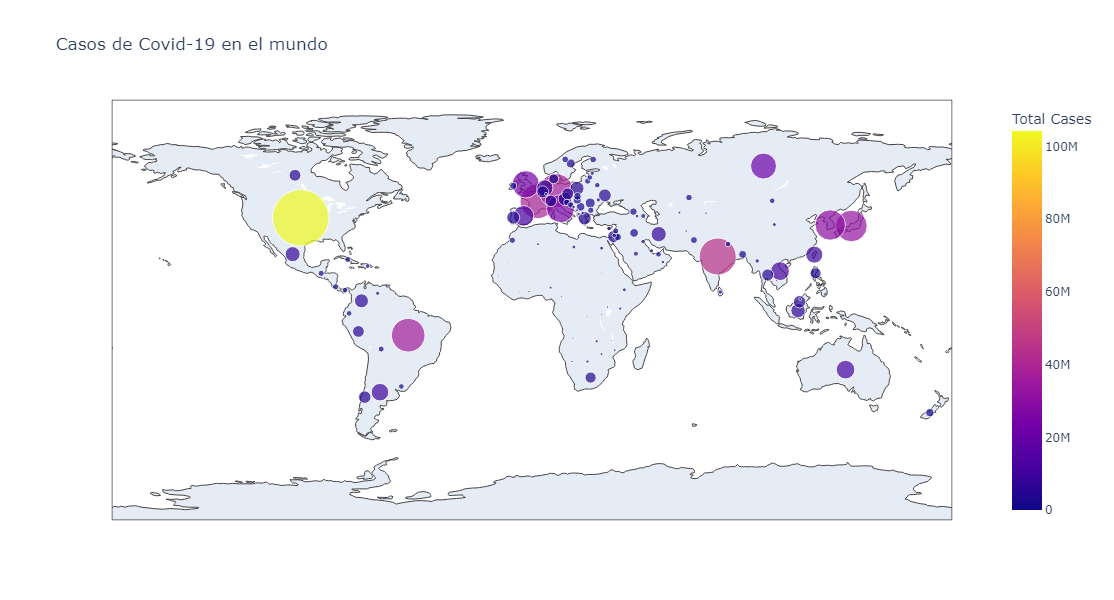

In [33]:
fig = px.scatter_geo(df, locations='Country', locationmode='country names', scope='world',
                     color='Total Cases', size='Total Cases', title='Casos de Covid-19 en el mundo', size_max=40)

fig.update_layout(width=1000, height=600, legend_title='Casos totales')
fig.show()

**Mapa del total de muertes**

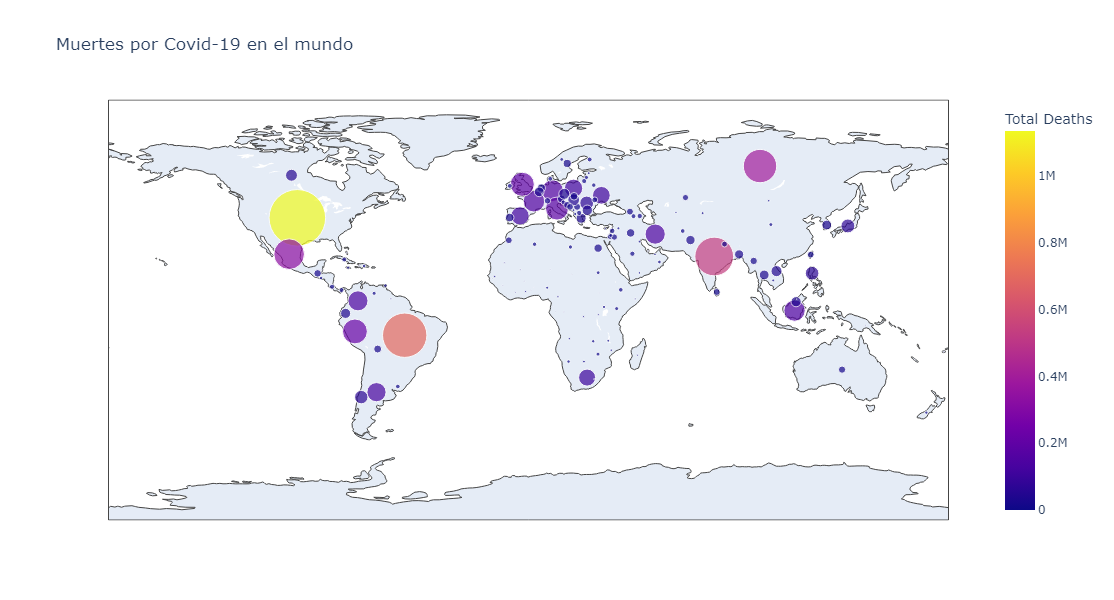

In [34]:
fig = px.scatter_geo(df, locations='Country', locationmode='country names', scope='world',
                     color='Total Deaths', size='Total Deaths', title='Muertes por Covid-19 en el mundo', size_max=40)

fig.update_layout(width=1000, height=600, legend_title='Casos totales')
fig.update_traces(name='Casos totales')
fig.show()

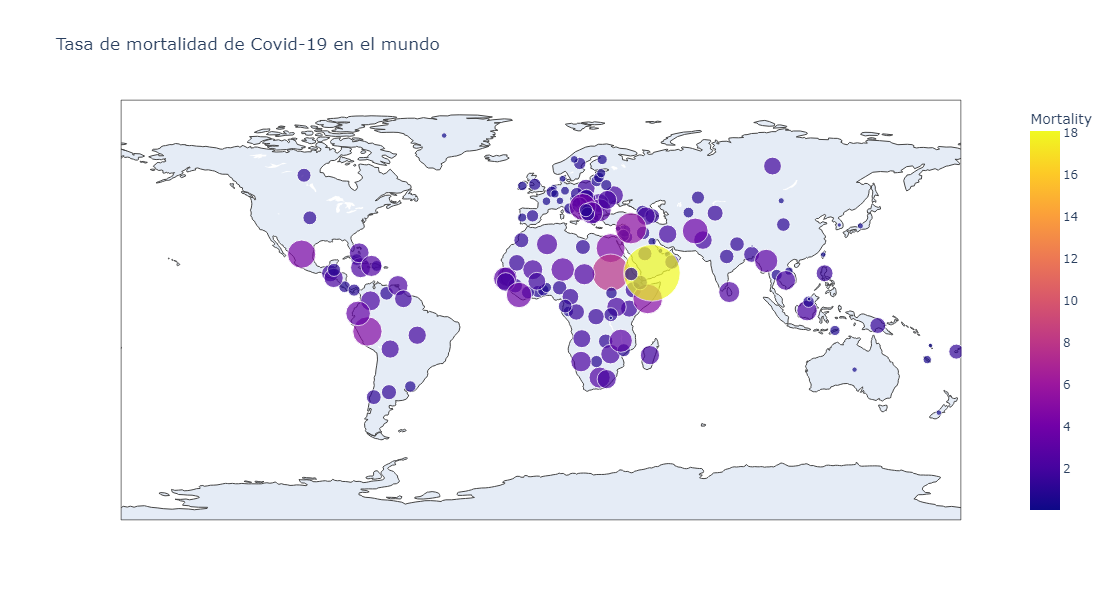

In [35]:
fig = px.scatter_geo(df, locations='Country', locationmode='country names', scope='world',
                     color='Mortality', size='Mortality', title='Tasa de mortalidad de Covid-19 en el mundo', size_max=40)

fig.update_layout(width=1000, height=600, legend_title='Casos totales')
fig.update_traces(name='Casos totales')
fig.show()

De las últimas gráficas se puede concluir que, aunque algunos países desarrollados muestran gran cantidad de casos de Covid, son los paises menos desarollados, como Latinoamérica y África, los que tienen la mayor tasa de mortalidad.